In [1]:
# Specify the parameter values
va_value = 0.5
s2vh_value = 0.8
wsp_value = 0.2

# Use the %run magic command to execute the script with specified parameters
%run RUNME --va $va_value --s2vh $s2vh_value --wsp $wsp_value

Trial: 0 of 3 alpha = 1.0
The simulations are now completed. now saving the results...
Trial: 1 of 3 alpha = 0.2499999999999999
The simulations are now completed. now saving the results...


In [ ]:
S = kit.load_all("SIRV_VA=0.5_S2Vh=0.8_WSP=0.2.h5","S")
I = kit.load_all("SIRV_VA=0.5_S2Vh=0.8_WSP=0.2.h5","I")
R = kit.load_all("SIRV_VA=0.5_S2Vh=0.8_WSP=0.2.h5","R")
V = kit.load_all("SIRV_VA=0.5_S2Vh=0.8_WSP=0.2.h5","V")
P = kit.load_all("SIRV_VA=0.5_S2Vh=0.8_WSP=0.2.h5","P")
H = kit.load_all("SIRV_VA=0.5_S2Vh=0.8_WSP=0.2.h5","H")

In [ ]:
data = kit.load_data_from_h5("SIRV_VA=0.5_S2Vh=0.8_WSP=0.2.h5")

In [ ]:
print(data["Simulation_1"])

S = data["Simulation_1"]["S-data"]
I = data["Simulation_1"]["I-data"]
R = data["Simulation_1"]["R-data"]
V = data["Simulation_1"]["V-data"]

{'H-data': array([-0.0074672, -0.0074672, -0.0074672, ..., -0.0074672, -0.0074672,
       -0.0074672]), 'I-data': array([0., 0., 0., ..., 0., 0., 0.]), 'P-data': array([0.16953368, 0.16953368, 0.16953368, ..., 0.16953368, 0.16953368,
       0.16953368]), 'R-data': array([0.00097656, 0.00097656, 0.00097656, ..., 0.00097656, 0.00097656,
       0.00097656]), 'S-data': array([0.92089844, 0.92089844, 0.92089844, ..., 0.92089844, 0.92089844,
       0.92089844]), 'V-data': array([0.078125, 0.078125, 0.078125, ..., 0.078125, 0.078125, 0.078125])}


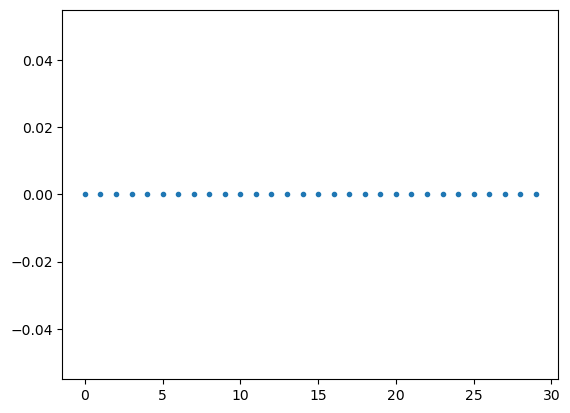

In [ ]:
import matplotlib.pyplot as plt
plt.plot(I[0:30],'.')

In [ ]:
global_path = 'C:/Users/nel_t/Documents/WORK/PROJECTS/a_KIT_4_ABM'   # <--- CHANGE THIS PATH to the one on your computer
code_path   = global_path + '/SRC'

#global_path = 'C:/Users/nel_t/Documents/WORK/PROJECTS/a_KIT_4_ABM'   # <--- CHANGE THIS PATH to the one on your computer
#code_path   = global_path + '/SRC'


# import the KIT_4_ABM package
import sys
sys.path.append(code_path)
import KIT_4_ABM as kit
import numpy as np
import argparse
import matplotlib.pyplot as plt
 
def reset_param(P_lay_original,P_sim_original,P_dyn_original,P_rec_original,ab):
    P_lay = P_lay_original.copy()
    P_dyn = P_dyn_original.copy()
    P_sim = P_sim_original.copy()
    P_rec = P_rec_original.copy()
    P_dyn["Dynamic_0"]["BEHAVIOR"]["IC"]["alpha"] = ab
    return P_lay, P_sim, P_dyn, P_rec

In [ ]:
va = 0.5
s2vh = 0.8
wsp = 0.2

va_ff = va             # Vaccines availability
S2V_h_ff = s2vh        # max P of vaccination
WSP_ff = wsp           # WS probability of rewiring

np.random.seed(42)
P_lay, P_dyn, P_sim, P_rec = kit.import_parameters("PAR_SIRV.json")
P_lay["Layer_0"]["P"] = WSP_ff
N = 3
d = 0.25/N

range_pol = np.linspace(0+d,0.25-d, N-1)
range_pol = np.array([0.249])
value_ab = 1/(8*range_pol)-0.5

P_rec["filename"] = P_rec["filename"]+ "_VA=" + str(va_ff)+ "_S2Vh="
P_rec["filename"] = P_rec["filename"] + str(S2V_h_ff) + "_WSP=" + str(WSP_ff) + ".h5"

P_dyn["Dynamic_0"]["VA"] = va_ff

P_lay_original = P_lay.copy()
P_dyn_original = P_dyn.copy()
P_sim_original = P_sim.copy()
P_rec_original = P_rec.copy()

n_trials = 1
count = 0
for i in range(n_trials):
    for ab in value_ab:
        print("Trial: " + str(count) + " of " + str(n_trials*N), "alpha = " + str(ab))
        
        P_lay, P_sim, P_dyn, P_rec = reset_param(P_lay_original, P_sim_original, P_dyn_original, P_rec_original, ab)

        res = kit.run_sim(P_lay, P_dyn, P_sim, P_rec)
        #kit.write_h5(count, P_rec,res)
        count += 1



Trial: 0 of 3 alpha = 0.002008032128514081
N_infected_neighbors =  1 , infection_probability =  0.4
node  480  got infected
N_infected_neighbors =  1 , infection_probability =  0.4
N_infected_neighbors =  1 , infection_probability =  0.4
N_infected_neighbors =  1 , infection_probability =  0.4
node  448  got infected
N_infected_neighbors =  1 , infection_probability =  0.4
N_infected_neighbors =  1 , infection_probability =  0.4
node  513  got infected
N_infected_neighbors =  1 , infection_probability =  0.4
N_infected_neighbors =  1 , infection_probability =  0.4
node  416  got infected
N_infected_neighbors =  1 , infection_probability =  0.4
N_infected_neighbors =  2 , infection_probability =  0.64
node  481  got infected
N_infected_neighbors =  1 , infection_probability =  0.4
node  514  got infected
N_infected_neighbors =  1 , infection_probability =  0.4
N_infected_neighbors =  1 , infection_probability =  0.4
node  545  got infected
N_infected_neighbors =  1 , infection_probabili

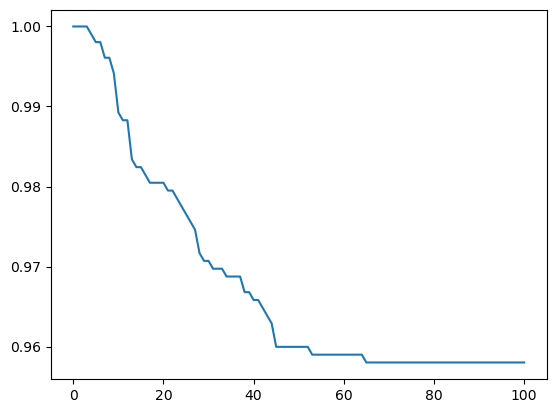

In [ ]:
plt.plot(1-res.R.data)